In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Import necessary libraries
import sympy as sym

In [2]:
# Step 1: Define the symbolic variable x
x = sym.symbols('x')

In [3]:
# Step 2: Define the function f(x) = x^2 * sin(0.5x)
f = (x ** 2) * sym.sin(0.5 * x)
f

x**2*sin(0.5*x)

In [5]:
# Step 3: Initialize an array to store Maclaurin series terms
ms = np.empty(20, dtype=object)
ms

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None], dtype=object)

In [6]:
# Step 4: Create an array of 500 points from -5 to 5 for plotting
x_values = np.linspace(-5, 5, 500)
x_values

array([-5.        , -4.97995992, -4.95991984, -4.93987976, -4.91983968,
       -4.8997996 , -4.87975952, -4.85971944, -4.83967936, -4.81963928,
       -4.7995992 , -4.77955912, -4.75951904, -4.73947896, -4.71943888,
       -4.6993988 , -4.67935872, -4.65931864, -4.63927856, -4.61923848,
       -4.5991984 , -4.57915832, -4.55911824, -4.53907816, -4.51903808,
       -4.498998  , -4.47895792, -4.45891784, -4.43887776, -4.41883768,
       -4.3987976 , -4.37875752, -4.35871743, -4.33867735, -4.31863727,
       -4.29859719, -4.27855711, -4.25851703, -4.23847695, -4.21843687,
       -4.19839679, -4.17835671, -4.15831663, -4.13827655, -4.11823647,
       -4.09819639, -4.07815631, -4.05811623, -4.03807615, -4.01803607,
       -3.99799599, -3.97795591, -3.95791583, -3.93787575, -3.91783567,
       -3.89779559, -3.87775551, -3.85771543, -3.83767535, -3.81763527,
       -3.79759519, -3.77755511, -3.75751503, -3.73747495, -3.71743487,
       -3.69739479, -3.67735471, -3.65731463, -3.63727455, -3.61

In [8]:
# Step 5: Create a 2D array to store function values and approximations for plotting
function_and_approximations = np.zeros([21, 500])
function_and_approximations

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
# Step 6: Evaluate and store the function values at each point in x_values
function_evaluation = sym.lambdify(x, f, 'numpy')
function_evaluation
function_and_approximations[20, :] = function_evaluation(x_values)

In [11]:
# Step 7: Perform Taylor series expansion around x = 0
for degree in range(20):
    # Calculate the nth derivative of f(x) at x = 0
    ms[degree] = f.diff(x, degree).subs(x, 0) * (
            x ** degree) / (np.math.factorial(degree))

    # Convert the symbolic expression to a NumPy function
    taylor_series_function = sym.lambdify(x, ms[degree], 'numpy')

    # Evaluate and store the approximation at each point in x_values
    function_and_approximations[degree, :] = taylor_series_function(x_values)

    # Print the Taylor series term for better understanding
    print(degree + 1, ":", ms[degree])

1 : 0
2 : 0
3 : 0
4 : 0.5*x**3
5 : 0
6 : -0.0208333333333333*x**5
7 : 0
8 : 0.000260416666666667*x**7
9 : 0
10 : -1.55009920634921e-6*x**9
11 : 0
12 : 5.38228891093474e-9*x**11
13 : 0
14 : -1.2232474797579e-11*x**13
15 : 0
16 : 1.96033249961201e-14*x**15
17 : 0
18 : -2.33372916620478e-17*x**17
19 : 0
20 : 2.14497166011469e-20*x**19


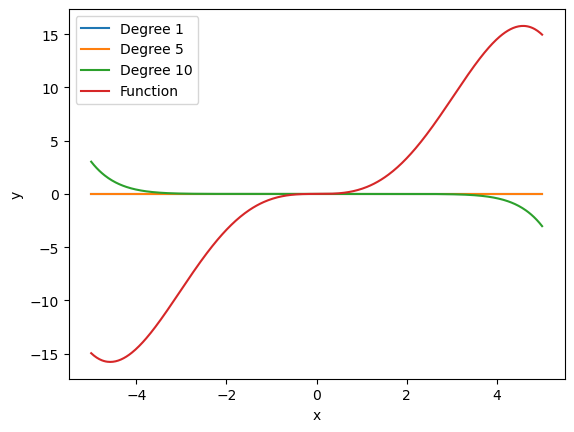

In [12]:
# Plotting
plt.plot(x_values, function_and_approximations[0, :], label="Degree 1")
plt.plot(x_values, function_and_approximations[4, :], label="Degree 5")
plt.plot(x_values, function_and_approximations[9, :], label="Degree 10")
plt.plot(x_values, function_and_approximations[20, :], label="Function")

# Add labels and legend for clarity
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Display the plot
plt.show()